# Lab 7: Word Learning as Bayesian Inference

**TODO 0**: Put your name and group members' name here.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

## Part 0: Preamble
In the last lecture, we looked at the basics of how Bayesian inference works, and saw how this framework can be applied to modeling the learning of word meaning for common nouns. We will walk through how we may implement this model.

## Part 1: Bayesian inference basics

**TODO 1**: Write the function **posteriors(priors, likelihoods)** that takes in a list of prior probabilities [$P(H_1), P(H_2), P(H_3)...$] and a list of likelihoods [$P(D|H_1), P(D|H_2), P(D|H_3)...$]. If we are considering $n$ hypotheses, each list should be of length $|n|$. The function should return a list of posterior probabilities computed based on the Bayes rule:

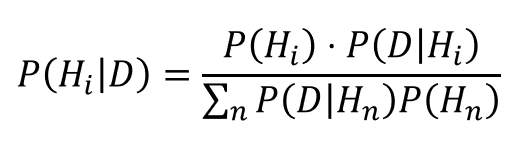

Remember, you can read the above as: posterior = (prior\*likelihood)/evidence, where the evidence is the sum of prior\*likelihood for all hypotheses.

In [4]:
def posteriors(priors, likelihoods):
    # Compute the evidence
    evidence = sum(prior * likelihood for prior, likelihood in zip(priors, likelihoods))
    
    # Compute the posterior probabilities
    posteriors = [prior * likelihood / evidence for prior, likelihood in zip(priors, likelihoods)]
    
    return posteriors

In [ ]:
priors = # copy values from lecture here
likelihoods = # copy values from lecture here

# You should get [0.8928571428571428, 0.04761904761904762, 0.05952380952380952]
print(posteriors(priors, likelihoods))

## Step 2: Word learning

### Step 2.1: The likelihood function and the size principle

**TODO 2.1**: Write the likelihood function **likelihood(observations, hypothesis)** that computes the likelihood based on the following equation that reflects the size principle: the likelihood of the hypothesis gets exponentially smaller as the set size increases.

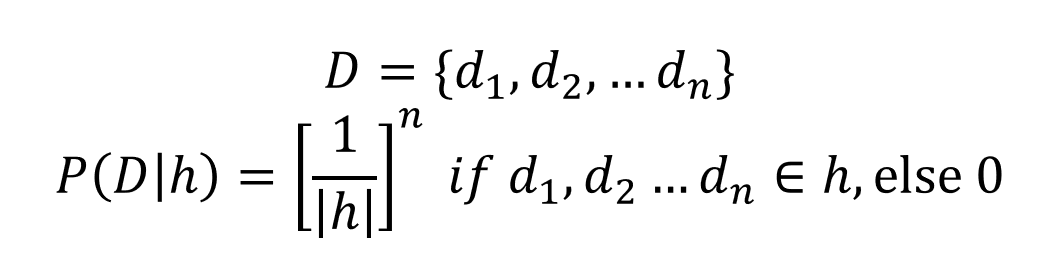

In [6]:
def likelihood(observations, hypothesis):
    # Check if all observations are in the hypothesis set
    if all(obs in hypothesis for obs in observations):
        # Compute the likelihood based on the size principle
        likelihood = 1 / len(hypothesis) ** len(observations)
    else:
        # If any observation is not in the hypothesis set, the likelihood is 0
        likelihood = 0
    
    return likelihood

In [7]:
h_mammal = [f"m{i}" for i in range(1, 101)]
h_dog = [f"m{i}" for i in range(1, 51)]
h_cat = [f"m{i}" for i in range(51, 91)]
h_whale = [f"m{i}" for i in range(91, 101)]
h_boston_terrier = [f"m{i}" for i in range(1, 11)]
h_labrador = [f"m{i}" for i in range(11, 31)]
h_poodle = [f"m{i}" for i in range(31, 51)]

one_observation = ["m2"]
two_observations = ["m2", "m4"]

In [10]:
# The values should be: 0.01, 0.02, 0, 0, 0.1, 0, 0
print(likelihood(one_observation, h_mammal))
print(likelihood(one_observation, h_dog))
print(likelihood(one_observation, h_cat))
print(likelihood(one_observation, h_whale))
print(likelihood(one_observation, h_boston_terrier))
print(likelihood(one_observation, h_labrador))
print(likelihood(one_observation, h_poodle))

0.01
0.02
0
0
0.1
0
0


In [11]:
# The values should be: 0.0001, 0.0004, 0, 0, 0.010000000000000002, 0, 0
print(likelihood(two_observations, h_mammal))
print(likelihood(two_observations, h_dog))
print(likelihood(two_observations, h_cat))
print(likelihood(one_observation, h_whale))
print(likelihood(two_observations, h_boston_terrier))
print(likelihood(two_observations, h_labrador))
print(likelihood(two_observations, h_poodle))

0.0001
0.0004
0
0
0.01
0
0


## Step 2.2: Determining the priors

The next step is to set the prior probabilities of the hypotheses. We talked about two priors that might be in play during class: the distinctiveness prior and the basic-level prior. For now, I will give you the scalar values that will stand in for the "height of the node in the taxonomy tree" that will signal how distinct the group is from its parent (stored in `distinctiveness`).

**TODO 2.2**: You will notice that these values don't some up to one: they are not probabilities! Your job here is to write code that achieves two things:

(1) getting a list of prior _probabilities_ that reflects just the distinctiveness

(2) getting a list of prior _probabilities_ that reflects both the distinctiveness and basic-level priors.

Recall that Xu & Tenenbaum incorporated basic-level priors by simply scaling the distinctiveness factors by a free parameter $\beta$. In any case, the final list of prior probabilities (each number corresponding to each hypothesis) should sum to 1. You can start by assuming $\beta=2$, but we will be adjusting this later on.

I have also written some additional helper dictionaries (`taxonomy` and `hypotheses`) for you: you can choose to use or not use them :)

In [13]:
# Just using some made-up distinctiveness values for now
distinctiveness = OrderedDict({
    "boston_terrier": 0.4,
    "poodle": 0.2,
    "labrador": 0.1,
    "dog": 0.3,
    "cat": 0.4,
    "whale": 0.8,
    "animal": 0.5,
})

taxonomy = OrderedDict({
    "boston_terrier": "subordinate",
    "poodle": "subordinate",
    "labrador": "subordinate",
    "dog": "basic",
    "cat": "basic",
    "whale": "basic",
    "animal": "superordinate",
})

hypotheses = OrderedDict({
    "boston_terrier": h_boston_terrier,
    "poodle": h_poodle,
    "labrador": h_labrador,
    "dog": h_boston_terrier + h_poodle + h_labrador,
    "cat": h_cat,
    "whale": h_whale,
    "mammal": h_mammal,
})

In [14]:
# Write your code here: I recommend creating two variables `prior_dist` and `prior_dist_basic`

# Calculate the prior probabilities based on distinctiveness
distinctiveness_values = list(distinctiveness.values())
total_distinctiveness = sum(distinctiveness_values)
prior_dist = [d / total_distinctiveness for d in distinctiveness_values]

# Calculate the prior probabilities based on distinctiveness and basic-level priors
beta = 2
prior_dist_basic = []
for key, value in taxonomy.items():
    if value == "basic":
        prior_dist_basic.append(distinctiveness[key] * beta)
    else:
        prior_dist_basic.append(distinctiveness[key])

total_prior_dist_basic = sum(prior_dist_basic)
prior_dist_basic = [p / total_prior_dist_basic for p in prior_dist_basic]

print("Prior probabilities based on distinctiveness:")
print(prior_dist)
print("Prior probabilities based on distinctiveness and basic-level priors (beta=2):")
print(prior_dist_basic)

Prior probabilities based on distinctiveness:
[0.14814814814814814, 0.07407407407407407, 0.037037037037037035, 0.1111111111111111, 0.14814814814814814, 0.2962962962962963, 0.18518518518518517]
Prior probabilities based on distinctiveness and basic-level priors (beta=2):
[0.09523809523809523, 0.047619047619047616, 0.023809523809523808, 0.14285714285714285, 0.19047619047619047, 0.38095238095238093, 0.11904761904761904]


## Step 2.3: Computing the posterior probabilities

Now we are ready to compute the posterior probabilities $P(h_n|D)$: the probability that the word meaning corresponds to the set represented by $h_n$ ($\in H$), given some observations $D$. We need to consider both the likelihood of $D$ and priors of $H$---you should already have a mechanism for calculating this from TODO 1.

Specifically, we will look at the four types of experiments conducted in Xu & Tenenbaum. Recall from the lecture that there were four learning conditions: 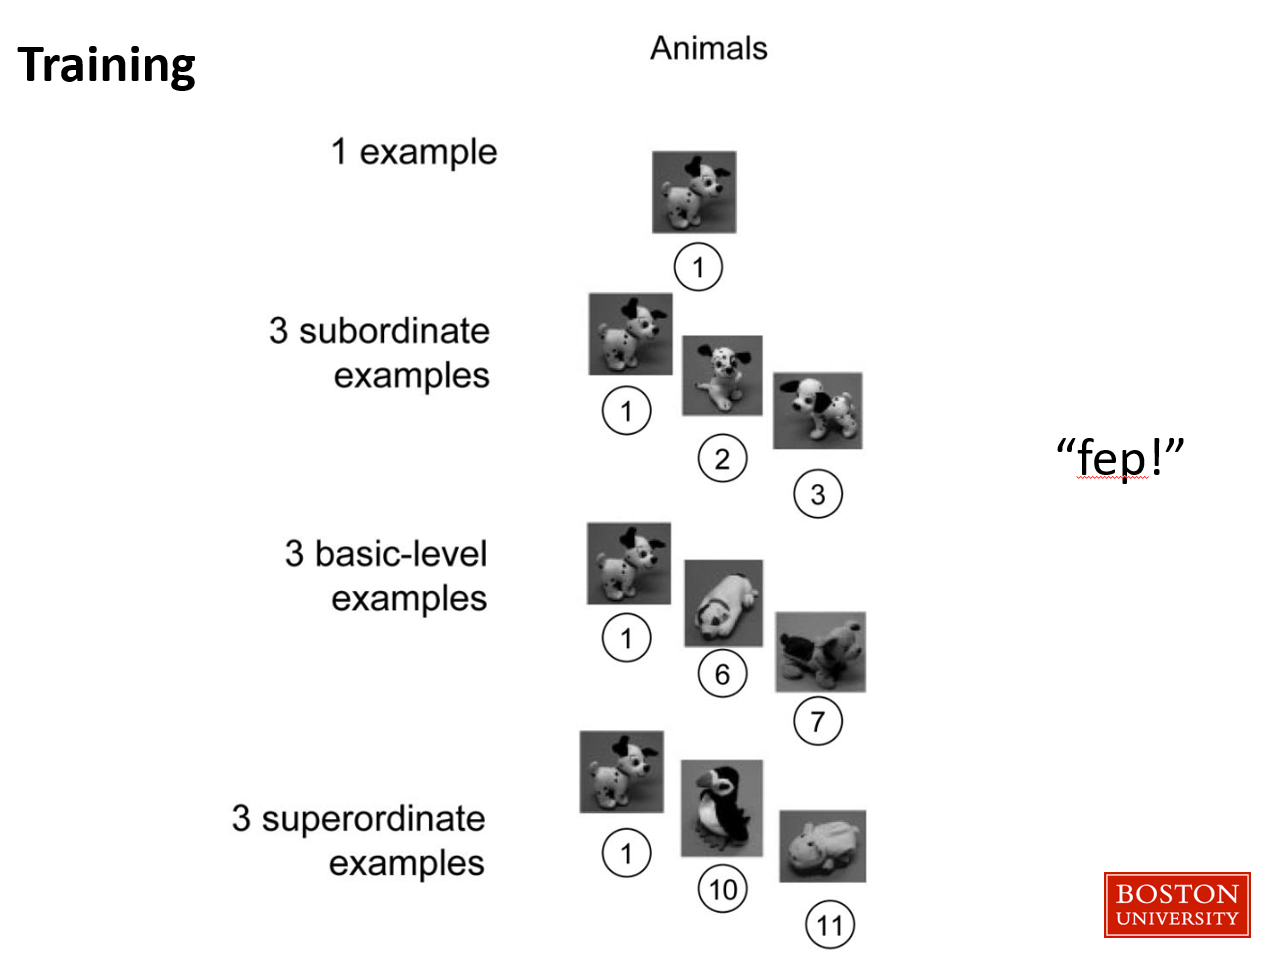

I've created similar training sets based on these learning conditions:

In [19]:
one_example = ["m2"] # a Boston Terrier

three_examples_subordinate = ["m2", "m4", "m8"] # three Boston Terriers
three_examples_basic = ["m1", "m22", "m41"] # three dogs (BT, poodle, lab)
three_examples_superordinate = ["m3", "m60", "m91"] # three mammals (dog, cat, whale)

**TODO 2.3**: For each experiment, compute the posterior probability of each hypothesis. Remember that you have two different priors from TODO 2.2: one that only reflects the distinctiveness prior and the other incorporating both distinctiveness and basic-level priors. 

First, use the version that only reflects the distinctiveness prior and store the posteriors in four lists: `one_example_post`, `three_examples_subordinate_post`, `three_examples_basic_post`, and `three_examples_superordinate_post`. Each list will contain 7 elements (for 7 hypotheses).

Second, do the same using the other prior: the on that incorporates the basic-level prior as well. Store the posteriors in four new lists: `one_example_post_basic`, `three_examples_subordinate_post_basic`, `three_examples_basic_post_basic`, and `three_examples_superordinate_post_basic`.

In [20]:
# Compute the posteriors by using prior_dist
one_example_post = posteriors(prior_dist, [likelihood(one_example, hypotheses[h]) for h in hypotheses])
three_examples_subordinate_post = posteriors(prior_dist, [likelihood(three_examples_subordinate, hypotheses[h]) for h in hypotheses])
three_examples_basic_post = posteriors(prior_dist, [likelihood(three_examples_basic, hypotheses[h]) for h in hypotheses])
three_examples_superordinate_post = posteriors(prior_dist, [likelihood(three_examples_superordinate, hypotheses[h]) for h in hypotheses])

In [21]:
# Compute the posteriors by using prior_dist_basic

one_example_post_basic = posteriors(prior_dist_basic, [likelihood(one_example, hypotheses[h]) for h in hypotheses])
three_examples_subordinate_post_basic = posteriors(prior_dist_basic, [likelihood(three_examples_subordinate, hypotheses[h]) for h in hypotheses])
three_examples_basic_post_basic = posteriors(prior_dist_basic, [likelihood(three_examples_basic, hypotheses[h]) for h in hypotheses])
three_examples_superordinate_post_basic = posteriors(prior_dist_basic, [likelihood(three_examples_superordinate, hypotheses[h]) for h in hypotheses])

In [22]:
print("Posteriors using distinctiveness prior:")
print("One example:", one_example_post)
print("Three subordinate examples:", three_examples_subordinate_post)
print("Three basic examples:", three_examples_basic_post)
print("Three superordinate examples:", three_examples_superordinate_post)

print("\nPosteriors using distinctiveness and basic-level priors:")
print("One example:", one_example_post_basic)
print("Three subordinate examples:", three_examples_subordinate_post_basic)
print("Three basic examples:", three_examples_basic_post_basic)
print("Three superordinate examples:", three_examples_superordinate_post_basic)

Posteriors using distinctiveness prior:
One example: [0.7843137254901961, 0.0, 0.0, 0.11764705882352941, 0.0, 0.0, 0.0980392156862745]
Three subordinate examples: [0.9928021841648051, 0.0, 0.0, 0.00595681310498883, 0.0, 0.0, 0.0012410027302060063]
Three basic examples: [0.0, 0.0, 0.0, 0.8275862068965518, 0.0, 0.0, 0.1724137931034483]
Three superordinate examples: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

Posteriors using distinctiveness and basic-level priors:
One example: [0.7017543859649124, 0.0, 0.0, 0.2105263157894737, 0.0, 0.0, 0.08771929824561403]
Three subordinate examples: [0.9869232667160127, 0.0, 0.0, 0.011843079200592152, 0.0, 0.0, 0.0012336540833950158]
Three basic examples: [0.0, 0.0, 0.0, 0.9056603773584906, 0.0, 0.0, 0.09433962264150943]
Three superordinate examples: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


### ===== Below will be part of Assignment 3, so you don't need to submit these as part of the lab exercise submission. But feel free to tackle them if you have time! =====

## Step 2.4: Inference as hypothesis averaging

In the graph below, in (c) and (d) (the human experimental results), the leftmost black bars indicate the probability that an unseen dalmatian (a member of a subordinate category---in our example, Boston Terrier) will be picked out as a _fep_ when the learners were shown a dalmatian as an example of _fep_. The second to the left dark gray bars indicate the probability that an unseen dog (a member of the basic category, like a poodle) will be picked out as a _fep_ when the learners were shown one dalmatian as an example of _fep_. The third to the left light gray bars indicate the probability that an unseen animal (a member of the superordinate category, like a cat) will be picked out as a _fep_ when the learners were shown one dalmatian as an example of _fep_.

The next groups of tricolored bars indicate the same probabilities (the probabilities that members of the subordinate, basic, and superordinate categories will be picked out as _fep_) when the participants learned the word meaning by seeing three examples rather than one. "3 sub." means the three examples were all dalmatians (for example), "3 basic" means the three examples were different types of dogs, and "3 super." means the three examples were different types of animals.

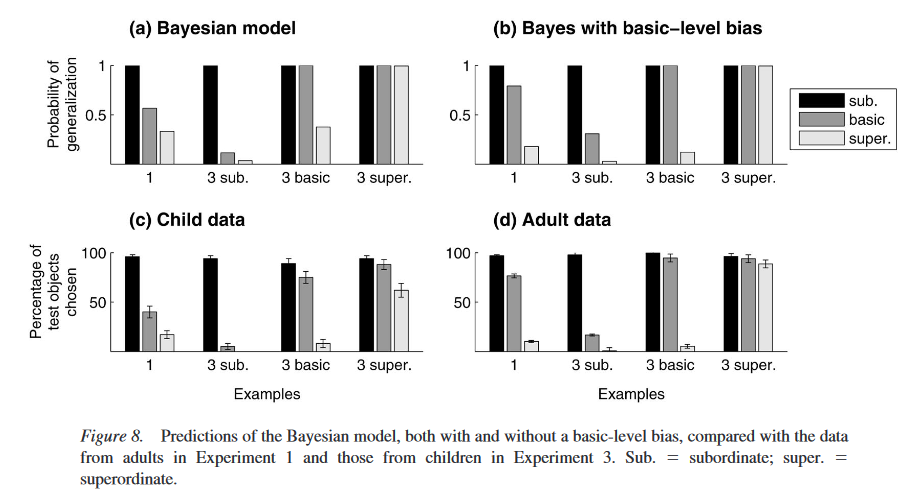

The posterior probabilities we computed above doesn't directly give us a way to evaluate this kind of generalization behavior with respect to a particular word meaning: that is, whether a given object $y$ belongs to the sampling set $C$ specified by the meaning given the data ($P(y \in C|D)$). Xu & Tenenbaum (2007) use hypothesis averaging to model how often the learners indicate that an unseen object belongs to the set of objects that can be described with the novel word learned (e.g., in the extension of _fep_):

$P(y \in C|D) = \sum_{h \in H}P(y \in C|h)P(h|D)$

where:

* $H$ is the set of all possible hypotheses
* $P(y \in C|h)$ is 1 if $y \in h$ and 0 if $y \notin h$
* $P(h|D)$ is the posterior probability of $h$

**TODO 2.4**: Compute the generalization probabilities of the four different experimental scenarios in Xu & Tenenbaum as shown in the graph above.

In [23]:
def hypothesis_averaging(hypotheses, posteriors, y):
    prob_sum = 0
    for h, post in zip(hypotheses, posteriors):
        if y in h:
            prob_sum += post
    return prob_sum

In [24]:
unseen_subordinate = "m9"
unseen_basic = "m23"
unseen_superordinate = "m95"

print(hypothesis_averaging(hypotheses.values(), one_example_post, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), one_example_post, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), one_example_post, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post, unseen_superordinate))

1.0
0.2156862745098039
0.0980392156862745

1.0
0.007197815835194837
0.0012410027302060063

1.0
1.0
0.1724137931034483

1.0
1.0
1.0


In [25]:
print(hypothesis_averaging(hypotheses.values(), one_example_post_basic, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), one_example_post_basic, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), one_example_post_basic, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post_basic, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post_basic, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_subordinate_post_basic, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post_basic, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post_basic, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_basic_post_basic, unseen_superordinate))
print()

print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post_basic, unseen_subordinate))
print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post_basic, unseen_basic))
print(hypothesis_averaging(hypotheses.values(), three_examples_superordinate_post_basic, unseen_superordinate))

1.0
0.29824561403508776
0.08771929824561403

0.9999999999999999
0.013076733283987167
0.0012336540833950158

1.0
1.0
0.09433962264150943

1.0
1.0
1.0


These numbers are kind of hard to read, so we'll try to make these into a graph so they are visualized!

## Part 3: Plotting!
If you did everything right, running the following three cells will give you plots corresponding to (a) and (b) in the figure above. Do your figures look similar? If you think you need to change the $\beta$ parameter to get Figure (b) to be more similar, now is the time to do this :) 

**TODO 3**: What do you think is a good value of the free parameter $\beta$?

Based on the results shown in the figures, a good value for the free parameter $\beta$ seems to be around 2 or 3 because with $\beta=2$ (Image 2), the generalization probabilities for the basic-level category (orange bars) are higher compared to the model without the basic-level prior (Image 1). This aligns with the human experimental results shown in (c) and (d) of the original figure, where the basic-level generalization is more prominent.

Also, the subordinate-level generalization (blue bars) remains high in the "3 sub." training condition, similar to the human data. This suggests that the model with $\beta=2$ captures the human-like generalization behavior at the subordinate level. The superordinate-level generalization (green bars) is relatively low in the "1" and "3 sub." training conditions, which is consistent with the human data. However, it is still higher than the human results, indicating that a slightly higher $\beta$ value might be needed to further suppress the superordinate-level generalization.

Lastly, if we increase the $\beta$ to a much higher value (e.g., 5 or 10), it would likely to overemphasize the basic-level prior and reduce the subordinate-level generalization, and thus deviate from the human data.

In [26]:
gen_probs = []
training_types = []
target_types = []
prior_types = []

for target_name, target in {"sub.": unseen_subordinate, "basic": unseen_basic, "super.": unseen_superordinate}.items():
    for post_name, post in {
        "1": one_example_post,
        "3 sub.": three_examples_subordinate_post,
        "3 basic": three_examples_basic_post,
        "3 super.": three_examples_superordinate_post
    }.items():
        gen_probs.append(hypothesis_averaging(hypotheses.values(), post, target))
        training_types.append(post_name)
        target_types.append(target_name)
        prior_types.append("distinctiveness only")

    for post_name, post in {
        "1": one_example_post_basic,
        "3 sub.": three_examples_subordinate_post_basic,
        "3 basic": three_examples_basic_post_basic,
        "3 super.": three_examples_superordinate_post_basic,
    }.items():
        gen_probs.append(hypothesis_averaging(hypotheses.values(), post, target))
        training_types.append(post_name)
        target_types.append(target_name)
        prior_types.append("distinctiveness + basic-level")
        

df = pd.DataFrame(
    dict(
        gen_probs = gen_probs,
        training_type = training_types,
        target_type = target_types,
        prior_type = prior_types,
    )
)

df

,gen_probs,training_type,target_type,prior_type
0,1.000000,1,sub.,distinctiveness only
1,1.000000,3 sub.,sub.,distinctiveness only
2,1.000000,3 basic,sub.,distinctiveness only
3,1.000000,3 super.,sub.,distinctiveness only
4,1.000000,1,sub.,distinctiveness + basic-level
5,1.000000,3 sub.,sub.,distinctiveness + basic-level
6,1.000000,3 basic,sub.,distinctiveness + basic-level
7,1.000000,3 super.,sub.,distinctiveness + basic-level
8,0.215686,1,basic,distinctiveness only
9,0.007198,3 sub.,basic,distinctiveness only


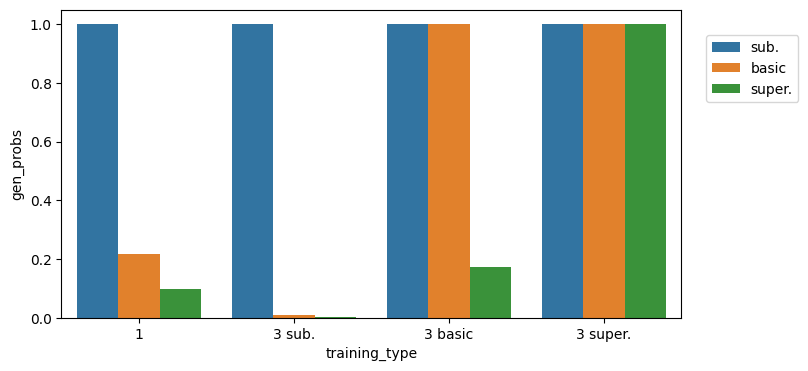

In [27]:
df_dist = df[df["prior_type"] == "distinctiveness only"]

plt.figure(figsize=(8,4))
sns.barplot(data=df_dist, x="training_type", y="gen_probs", hue="target_type")
plt.legend(loc=(1.04, 0.7))

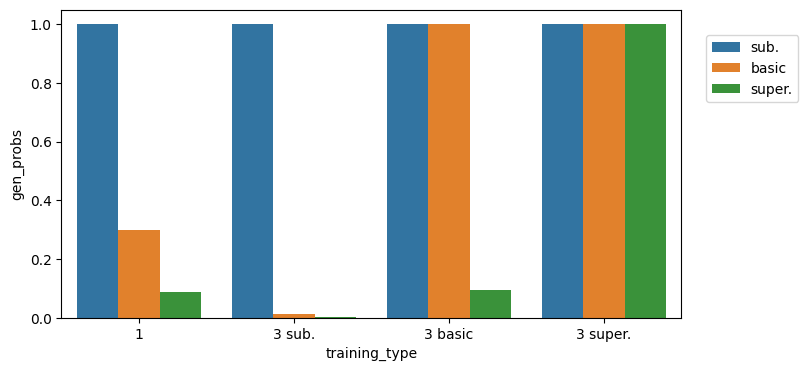

In [28]:
df_basic = df[df["prior_type"] == "distinctiveness + basic-level"]

plt.figure(figsize=(8,4))
sns.barplot(data=df_basic, x="training_type", y="gen_probs", hue="target_type")
plt.legend(loc=(1.04, 0.7))